## Método de Gumbel: modela eventos extremos.

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.67
Probabilidade de atingir ou exceder X: 0.67
Probabilidade de atingir ou ficar abaixo de X: 0.33
Proporção de valores menores ou iguais a X: 0.33
Valores menores que X: 41.00
Proporção de valores menores que X: 0.31

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 134.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 134.00
Proporção de valores menores que X: 1.00


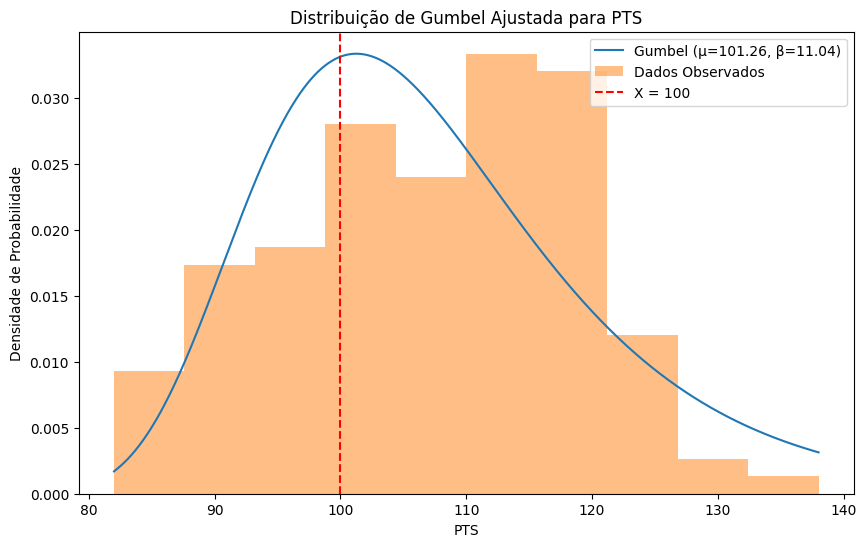

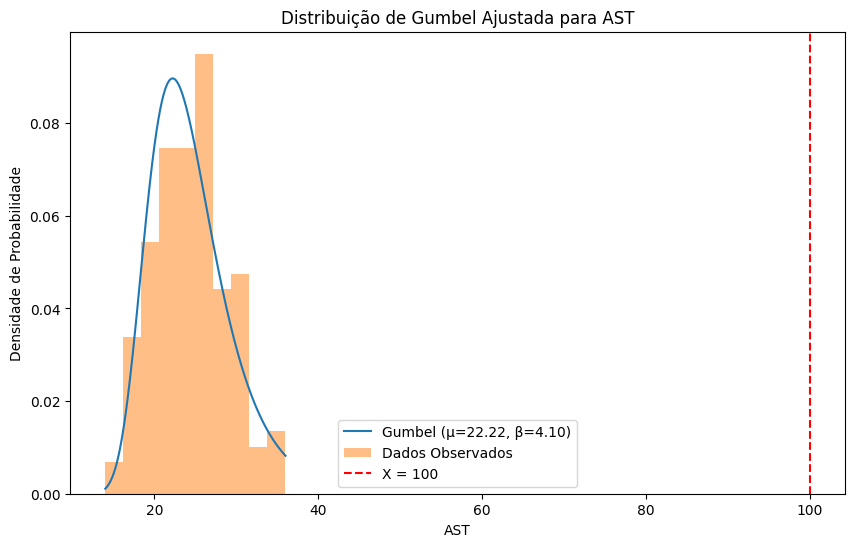

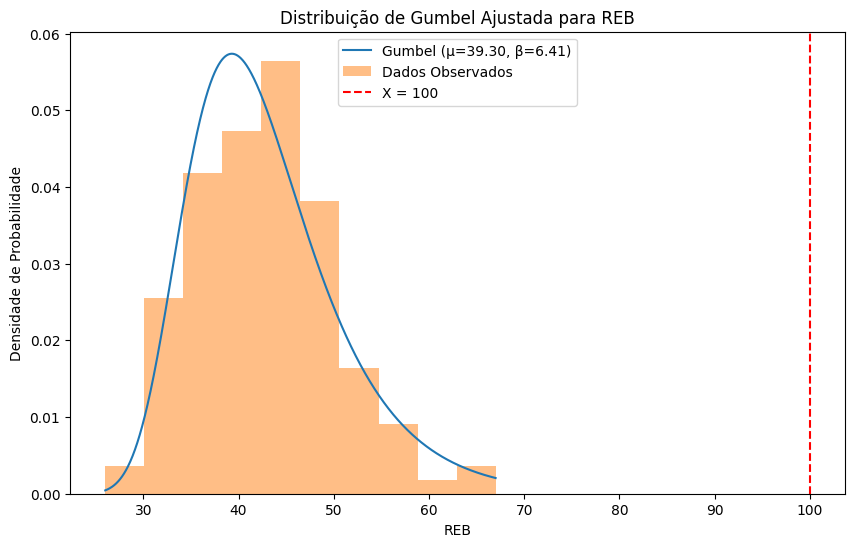

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 134.00
Proporção de valores menores que X: 1.00

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 134.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 134.00
Proporção de valores menores que X: 1.00


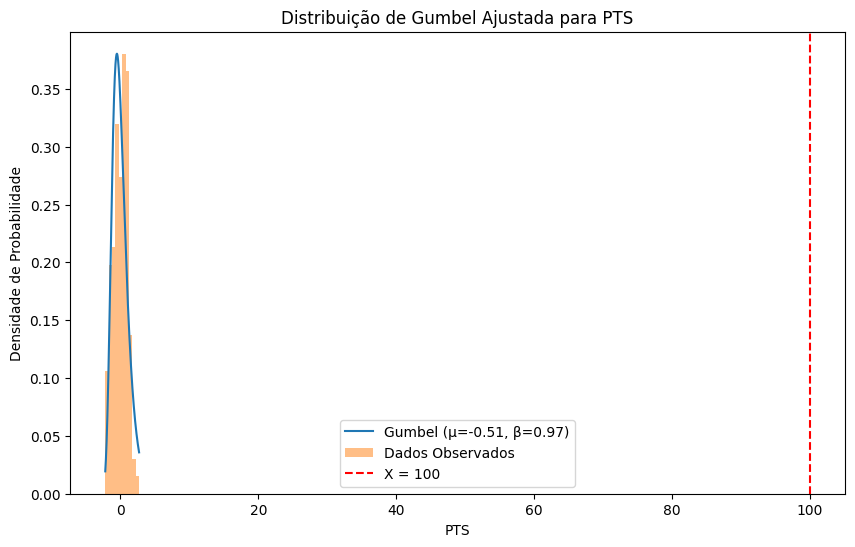

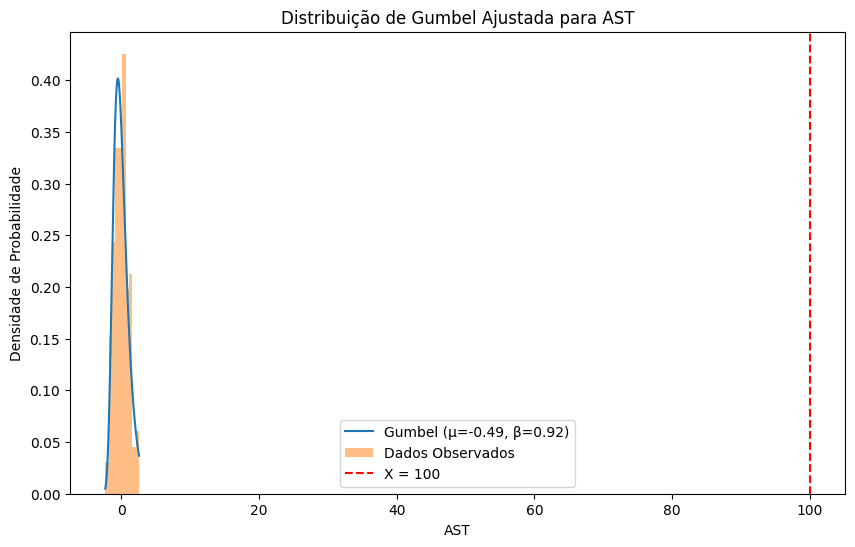

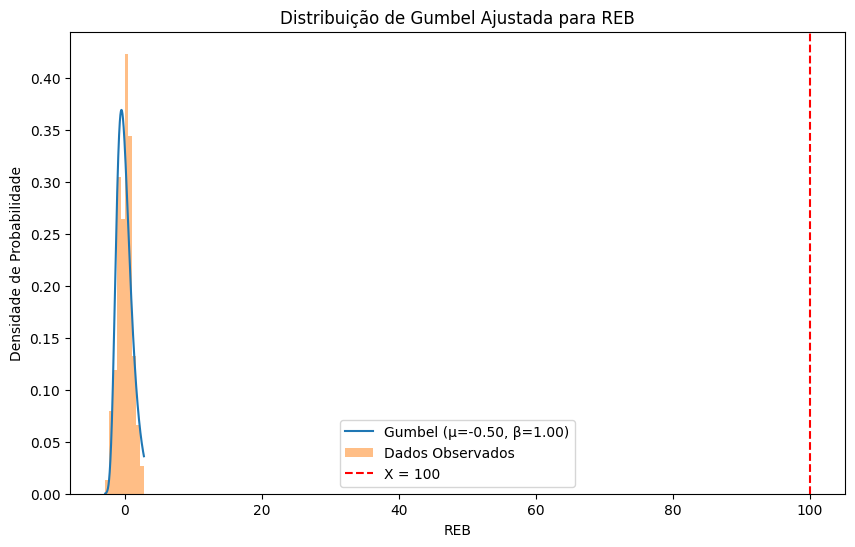

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed_scaled.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)